## Read Data

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('data/covid19_states.csv')
del df['Unnamed: 0']
df.head()

Province_State                                           flag-url  \
0        Alabama  https://upload.wikimedia.org/wikipedia/commons...   
1         Alaska  https://upload.wikimedia.org/wikipedia/commons...   
2        Arizona  https://upload.wikimedia.org/wikipedia/commons...   
3       Arkansas  https://upload.wikimedia.org/wikipedia/commons...   
4     California  https://upload.wikimedia.org/wikipedia/commons...   

   1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  1/27/2020  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          1          1   
3          0          0          0          0          0          0   
4          0          0          0          0          2          2   

   1/28/2020  1/29/2020  ...  6/23/2020  6/24/2020  6/25/2020  6/26/2020  \
0          0          0  ...      31097      32064      33206      34183   
1          0          0  ...        760        789        813        833   
2          1          1  ...      58378      60190      63281      66659   
3          0          0  ...      16678      17375      18062      18740   
4          2          2  ...     191477     196024     201112     206844   

   6/27/2020  6/28/2020  6/29/2020  6/30/2020  7/1/2020  7/2/2020  
0      35083      35441      37175      38045     38962     40111  
1        851        880        901        937       975      1014  
2      70124      73920      74545      79228     84105     87445  
3      19310      19818      20257      20777     21197     22075  
4     210692     215487     223646     231418    238681    246550  

[5 rows x 165 columns]

In [3]:
def get_dates(columns,style = '\d/\d+/\d{4}'):
    import re
    regexp = re.compile(style)
    dates = [regexp.search(x).group(0) for x in columns if regexp.search(x)]
    print('get %d records' %(len(dates)))
    return dates

In [4]:
dates = get_dates(df.columns)
df.index = df.Province_State
df = df[dates]
df.tail()

get 163 records


1/22/2020  1/23/2020  1/24/2020  1/25/2020  1/26/2020  \
Province_State                                                          
Virginia                0          0          0          0          0   
Washington              1          1          1          1          1   
West Virginia           0          0          0          0          0   
Wisconsin               0          0          0          0          0   
Wyoming                 0          0          0          0          0   

                1/27/2020  1/28/2020  1/29/2020  1/30/2020  1/31/2020  ...  \
Province_State                                                         ...   
Virginia                0          0          0          0          0  ...   
Washington              1          1          1          1          1  ...   
West Virginia           0          0          0          0          0  ...   
Wisconsin               0          0          0          0          0  ...   
Wyoming                 0          0          0          0          0  ...   

                6/23/2020  6/24/2020  6/25/2020  6/26/2020  6/27/2020  \
Province_State                                                          
Virginia            58994      59514      59946      60570      61247   
Washington          29386      29869      30367      30855      31404   
West Virginia        2593       2631       2694       2730       2782   
Wisconsin           25331      25763      26227      26747      27286   
Wyoming              1254       1282       1326       1368       1392   

                6/28/2020  6/29/2020  6/30/2020  7/1/2020  7/2/2020  
Province_State                                                       
Virginia            61736      62189      62787     63203     63735  
Washington          31752      32253      32824     33435     34151  
West Virginia        2832       2870       2905      2979      3053  
Wisconsin           27743      28058      28659     29199     29738  
Wyoming              1417       1450       1487      1514      1550  

[5 rows x 163 columns]

In [5]:
s = df.nlargest(10,['3/29/2020'])['3/29/2020']
s

Province_State
New York         59648
New Jersey       13386
California        5863
Michigan          5753
Massachusetts     4955
Illinois          4596
Washington        4465
Florida           4246
Louisiana         3540
Pennsylvania      3432
Name: 3/29/2020, dtype: int64

#### We’ll make a horizontal bar chart using the country names as the y-values and total deaths as the x-values (width of bars). Every bar will be a different color. 

In [6]:
import numpy as np
def random_color(num,style):
    colors = []
    if style == 'rgba':
        for x in range(0,num):
            colors.append(np.concatenate((np.random.choice(range(1000), size=3) / 1000,[1.0])))
    return colors

Wall time: 15 ms


<BarContainer object of 10 artists>

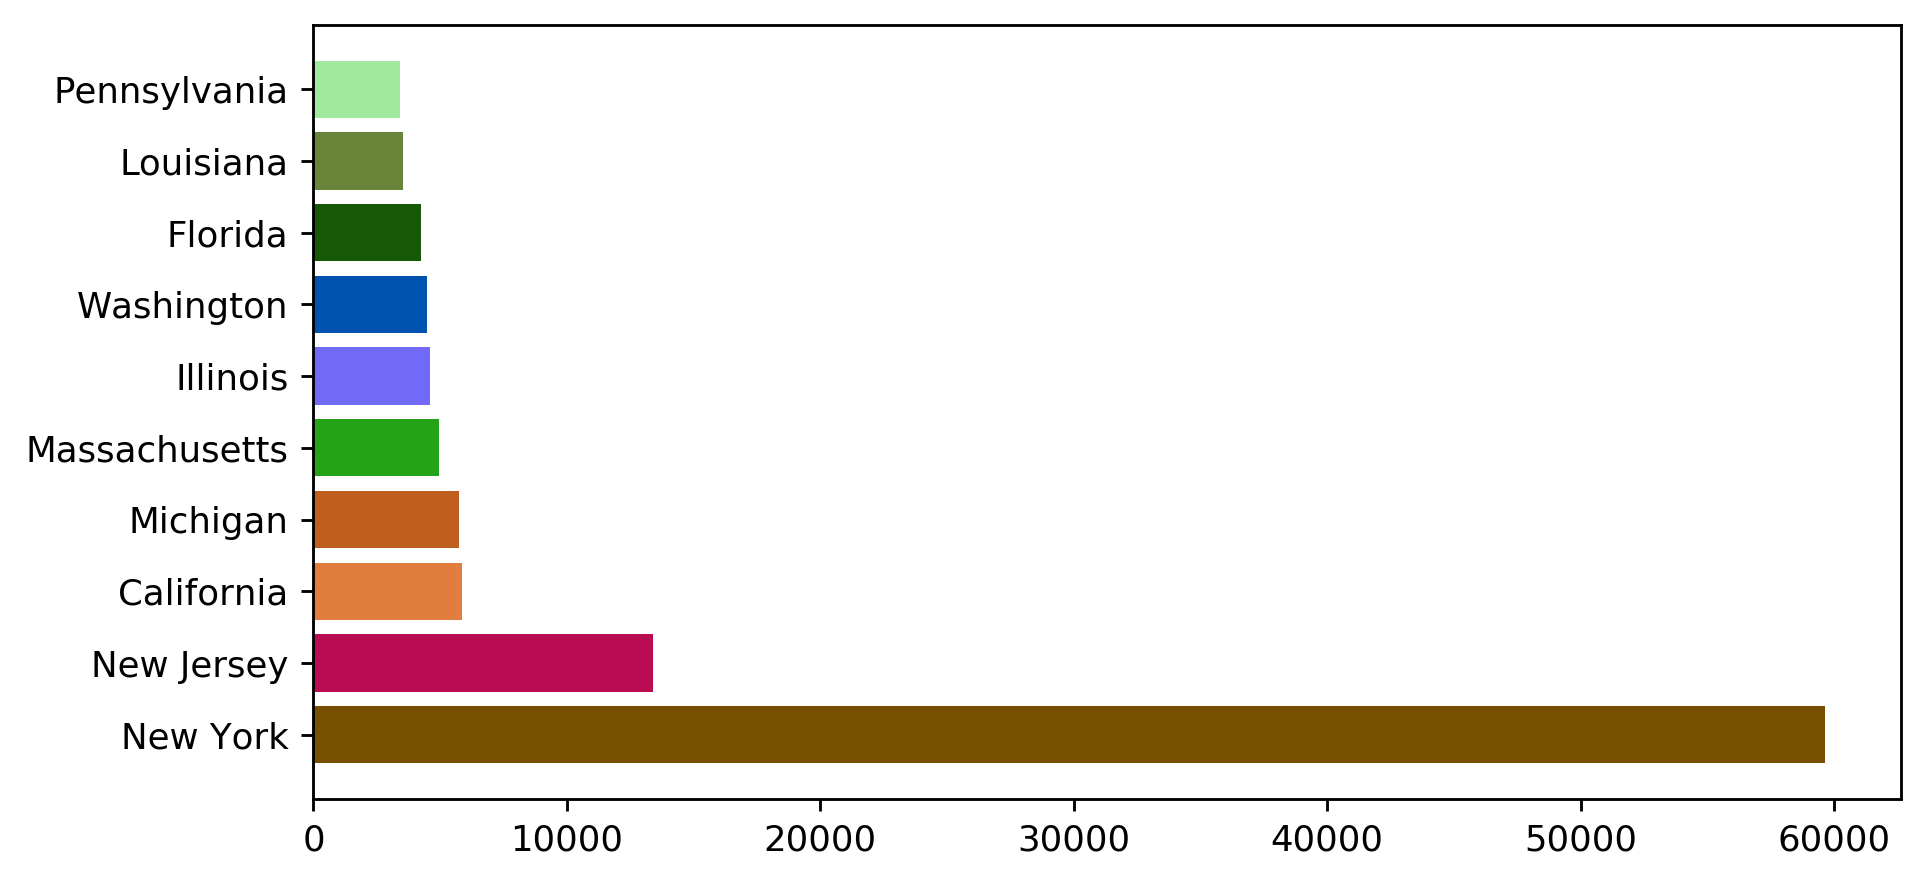

In [7]:
%%time
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (8,4),dpi = 256)
colors = random_color(10,'rgba')
y = s.index[:10]
width = s.values[:10]
ax.barh(y=y,width = width,color = colors)

The function below changes several properties of the axes to make it look nicer.

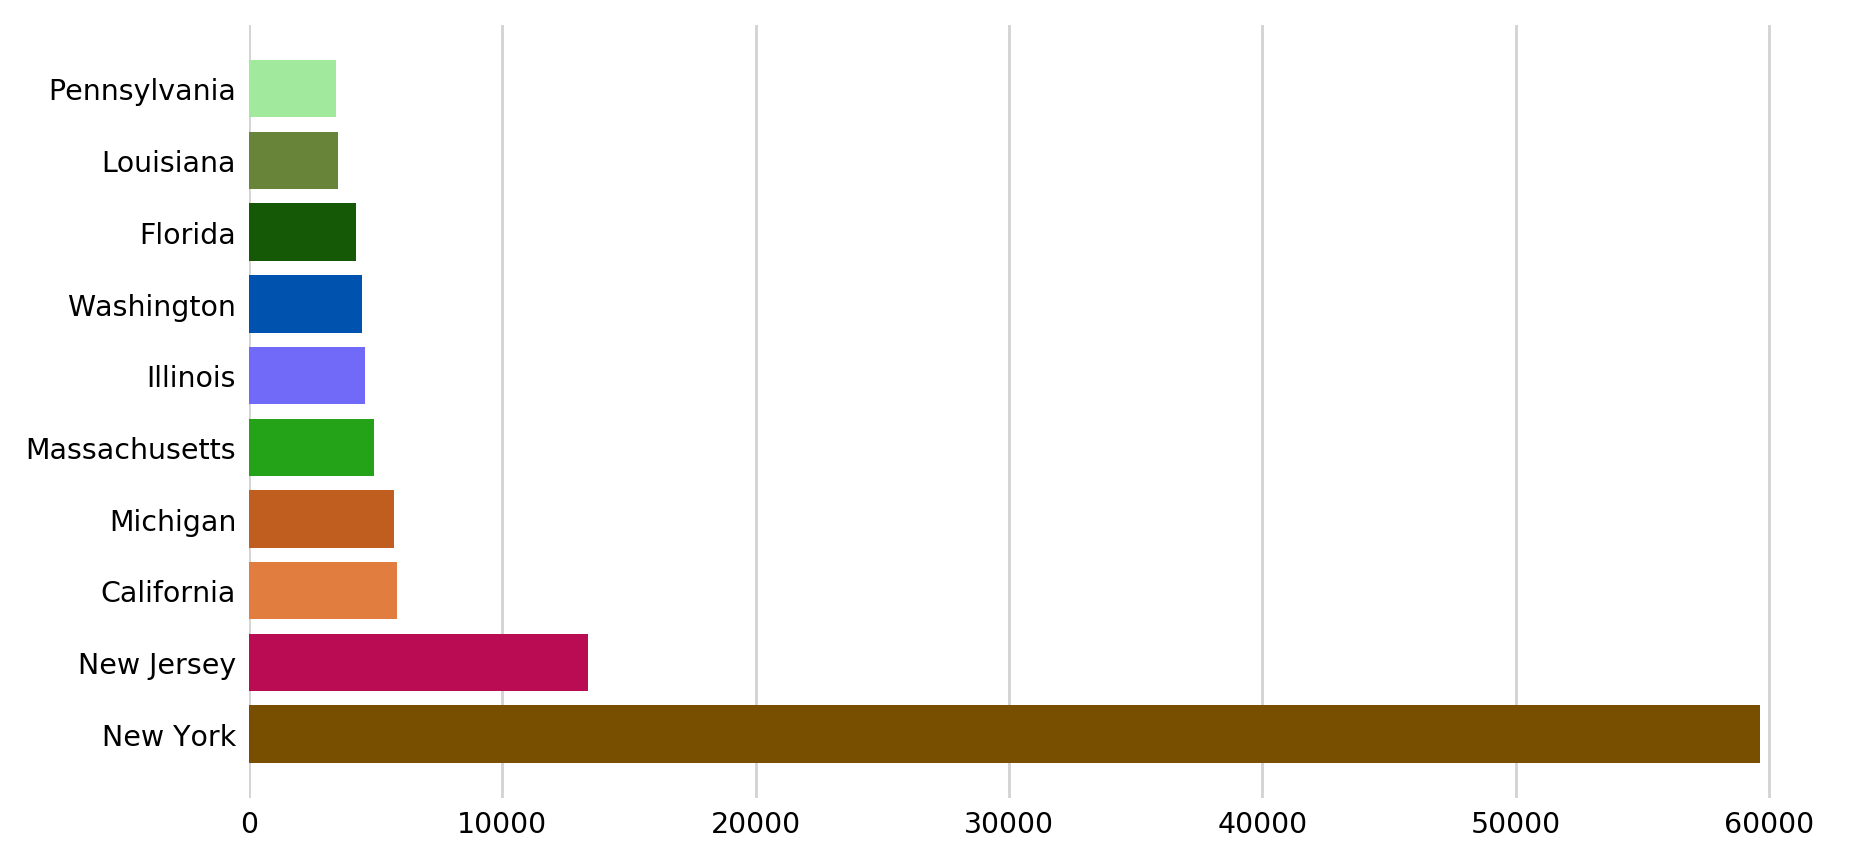

In [8]:
def nice_axes(ax):
    ax.set_facecolor('1')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='lightgrey')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

In [9]:
%%time
df['colors'] = random_color(len(df.index),'rgba')

Wall time: 6.02 ms


In [10]:
def normalize(lst,start = 0, end = 1):
    lst = (lst - lst.min()) / (lst.max()-lst.min()) * (end - start) + start
    return lst

Wall time: 41.9 ms


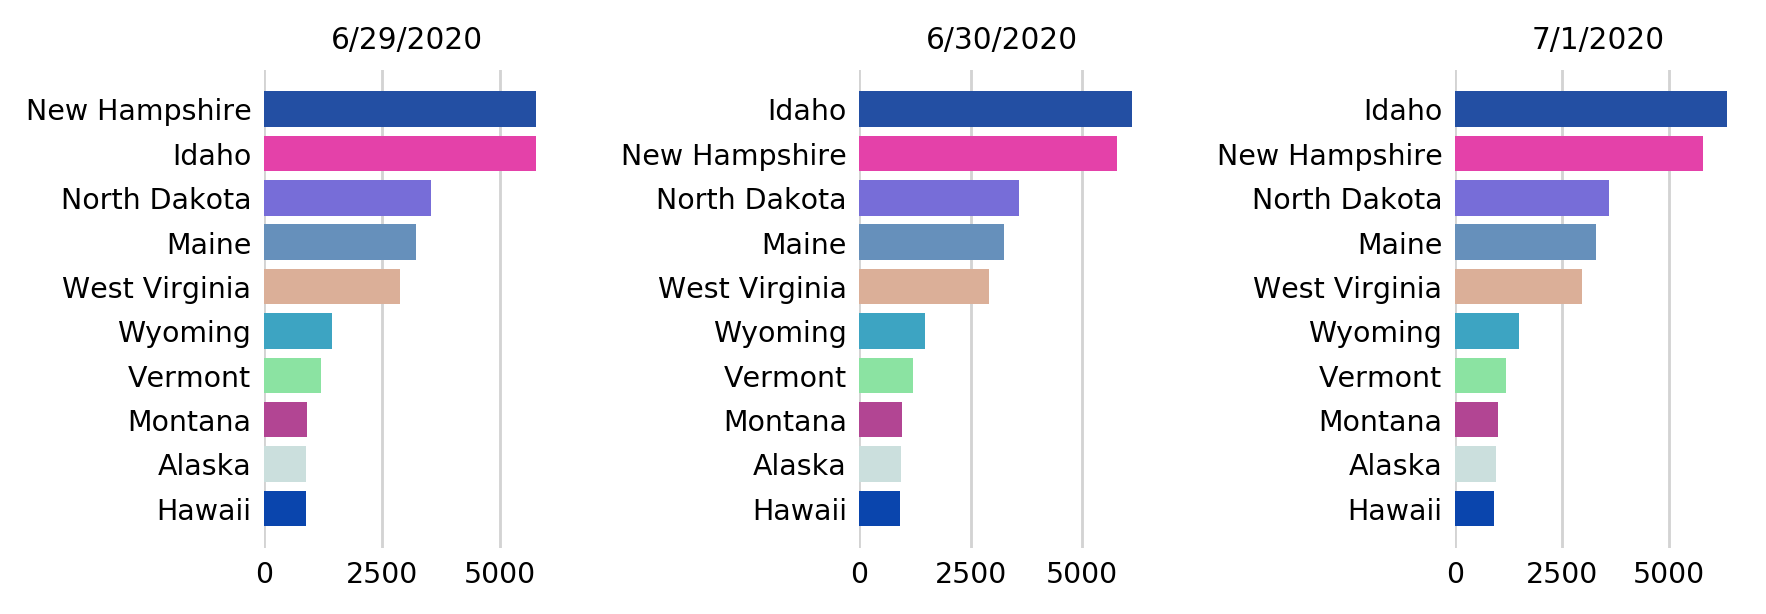

In [11]:
%%time
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=256, tight_layout=True)
dates = ['6/29/2020', '6/30/2020', '7/1/2020']
for ax, date in zip(ax_array, dates):
    s = df[date].sort_values()
    colors = df['colors']
    ax.barh(y=s.index[:10], width=s.values[:10], color=colors[:10])
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

## Countries change color
**Although the bars are ordered properly, the countries do not keep their original color** when changing places in the graph. Notice that the **New Hampshire** begins as the second bar in the second graph.
### Don't sort - rank instead!

In [12]:
df['3/29/2020'].rank(method='first')

Province_State
Alabama           26.0
Alaska             4.0
Arizona           28.0
Arkansas          18.0
California        48.0
Colorado          38.0
Connecticut       37.0
Delaware          10.0
Florida           43.0
Georgia           39.0
Hawaii             7.0
Idaho             14.0
Illinois          45.0
Indiana           34.0
Iowa              17.0
Kansas            16.0
Kentucky          20.0
Louisiana         42.0
Maine             13.0
Maryland          33.0
Massachusetts     46.0
Michigan          47.0
Minnesota         21.0
Missouri          30.0
Montana            8.0
Nebraska           5.0
Nevada            29.0
New Hampshire      9.0
New Jersey        49.0
New Mexico        12.0
New York          50.0
North Carolina    32.0
North Dakota       3.0
Ohio              35.0
Oklahoma          19.0
Oregon            22.0
Oregon            23.0
Pennsylvania      41.0
Rhode Island      15.0
South Carolina    25.0
South Dakota       2.0
Tennessee         36.0
Texas             4

In [13]:
# fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), 
#                              dpi=144, tight_layout=True)
# dates = ['3/29/2020', '5/30/2020', '7/1/2020']
# for ax, date in zip(ax_array, dates):
#     s = pd.DataFrame({date:df.loc[date],'State':df.loc[date].index})
#     s.index = s[date].rank(method='first')
#     s = s.sort_index() 
#     aax.barh(y=s.index[-10:], width=s[date].values[-10:], color=s['colors'][-10:], tick_label=s['states'][:10])
#     ax.set_title(date, fontsize='smaller')
#     nice_axes(ax)

Wall time: 77.8 ms


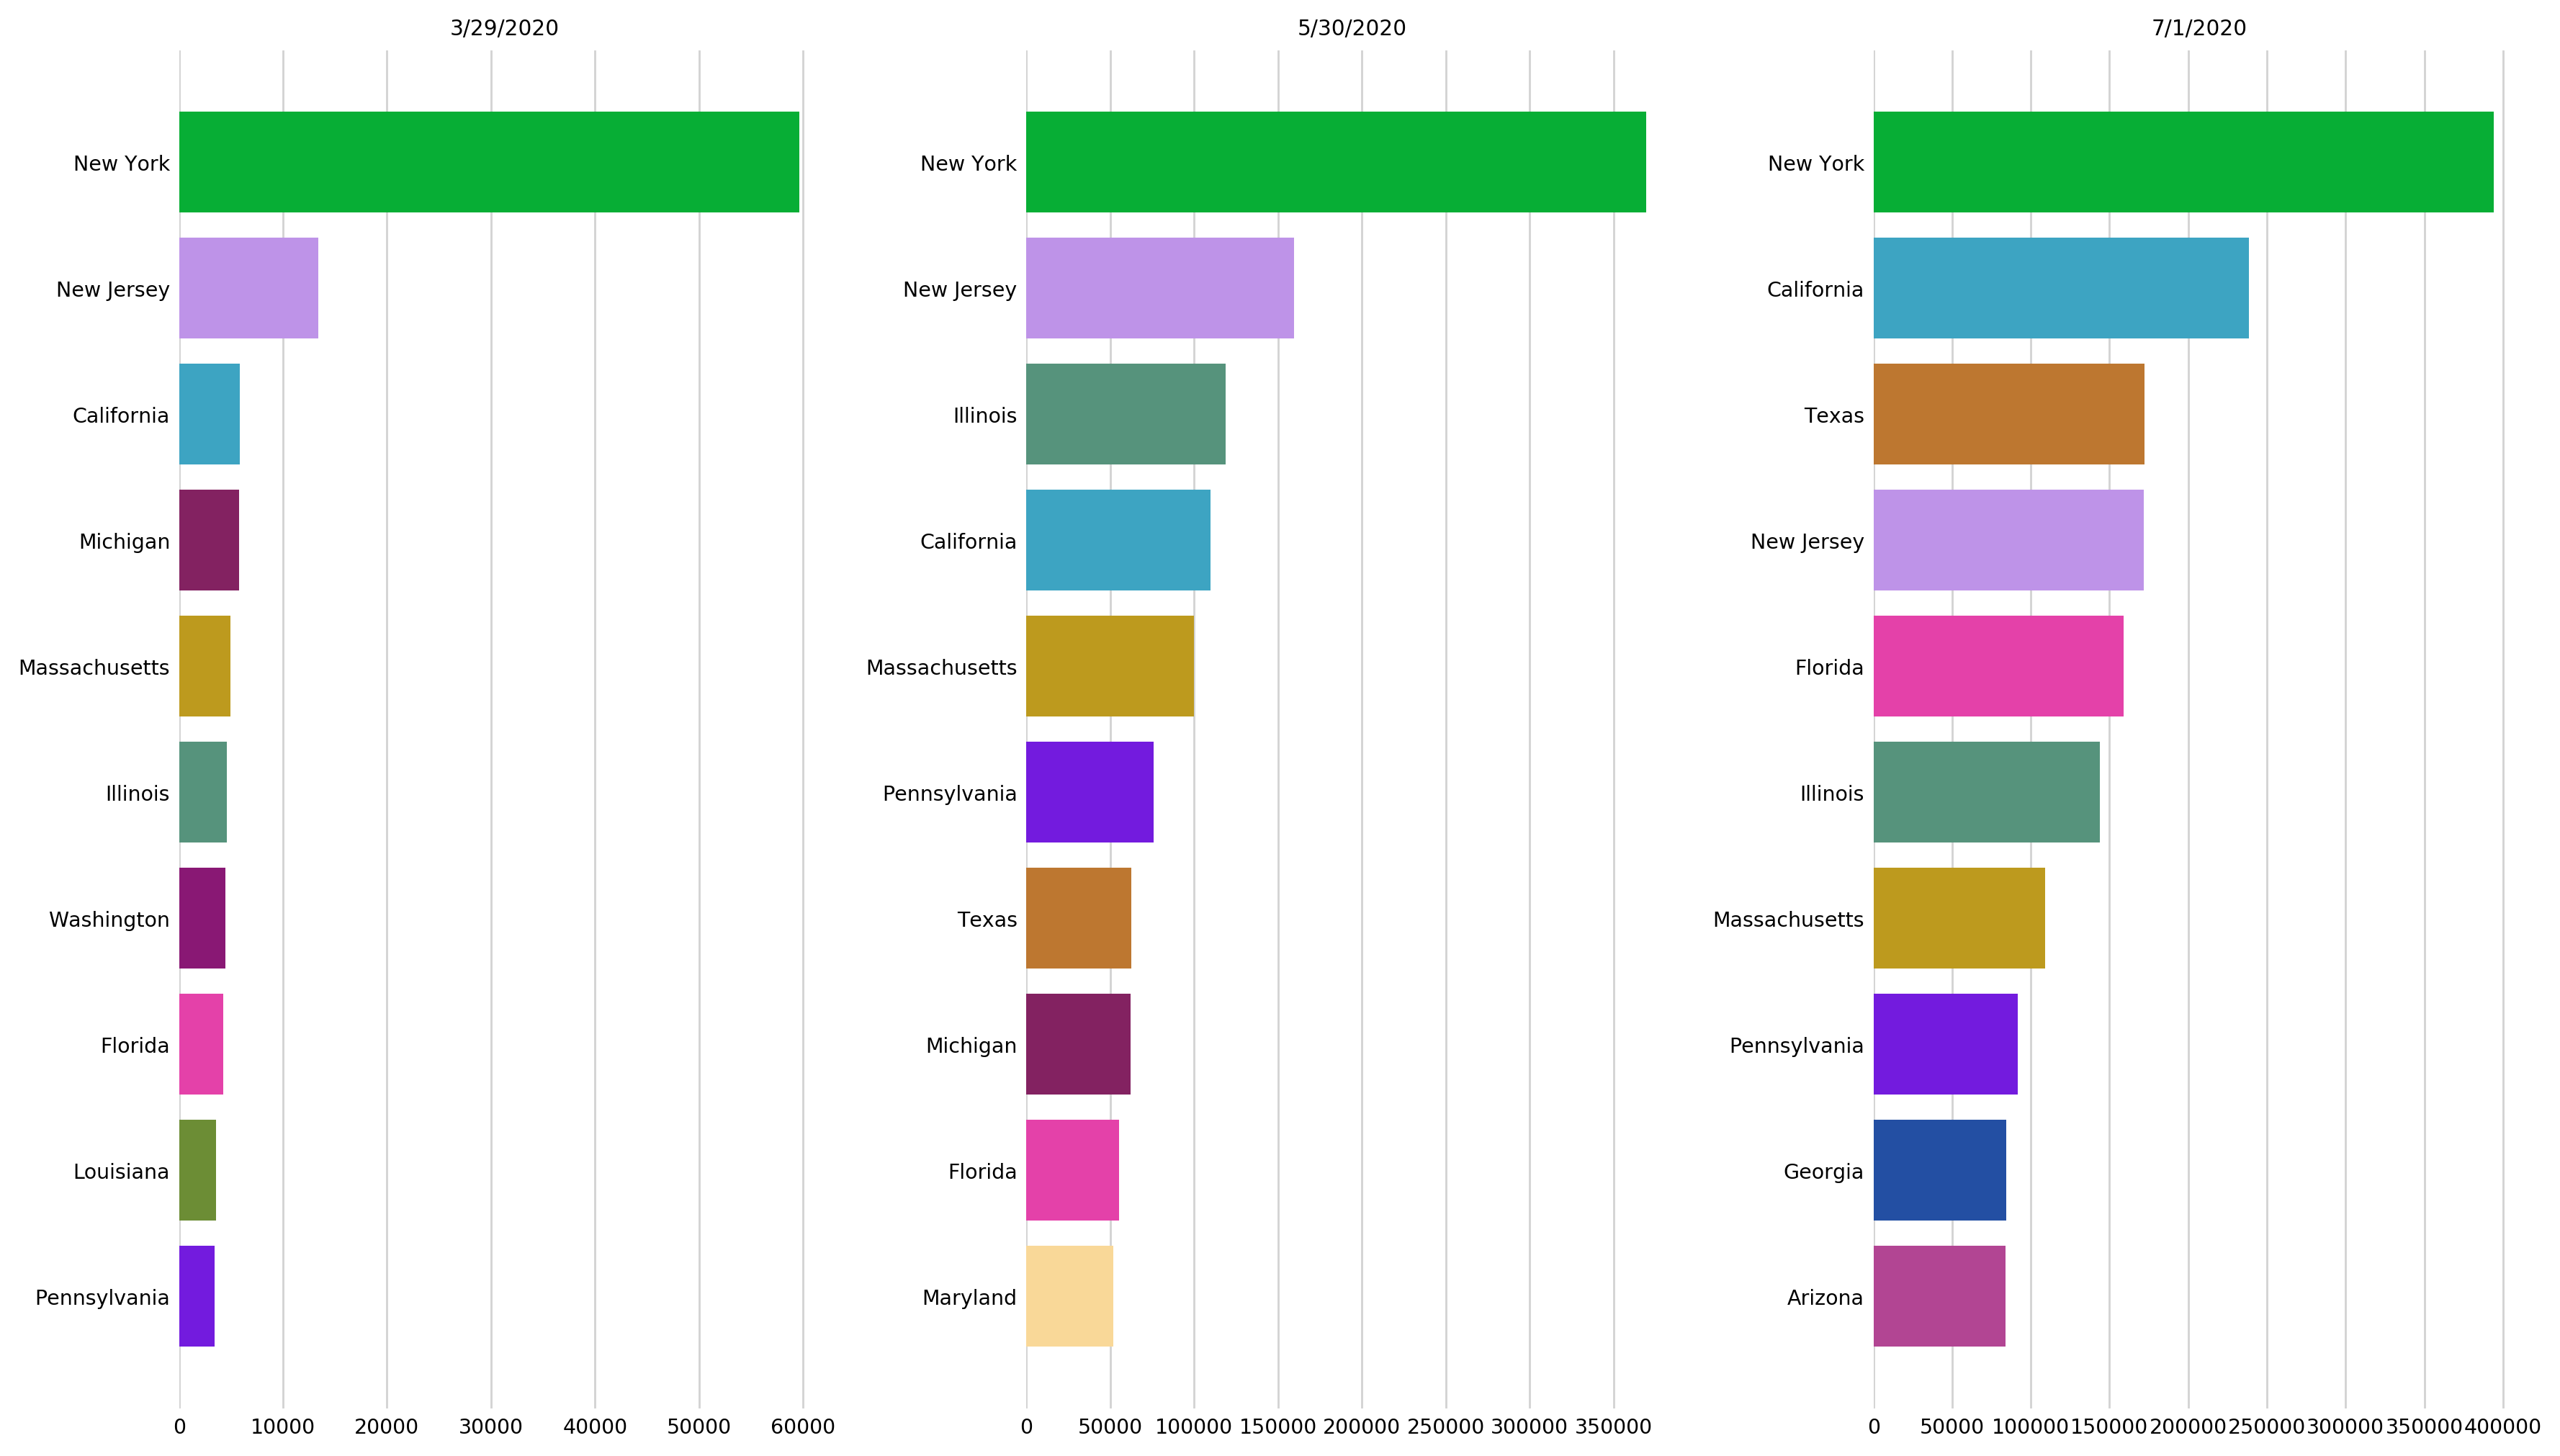

In [14]:
%%time
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(14, 8), 
                             dpi=256, tight_layout=True)
dates = ['3/29/2020', '5/30/2020', '7/1/2020']
for ax, date in zip(ax_array, dates):
    s = df.loc[:,[date,'colors']]
    s['Province_State'] = s.index    
    s.index = s[date].rank(ascending = 0) 
    s = s.sort_index() 
    ax.barh(y=s.index[10:0:-1], width=s[date].values[:10], color=s['colors'][:10], tick_label=s['Province_State'][:10])
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

## How to smoothly transition?
Using each day as a single frame in an animation won't work well as it doesn't capture the transition from one time period to the next. **In order to transition the bars that change positions, we'll need to add extra rows of data between the dates that we do have.** Let's first select the three dates above as a DataFrame.

In [15]:
dates = get_dates(df.columns)
df2 = df.loc[:,dates[105:110]]
df2.head()

get 163 records


5/6/2020  5/7/2020  5/8/2020  5/9/2020  5/10/2020
Province_State                                                   
Alabama             8691      9046      9385      9668       9889
Alaska               372       374       377       378        379
Arizona             9707      9945     10526     10960      11119
Arkansas            3611      3703      3747      3747       4012
California         60616     62148     63800     66572      67600

It's easier to **insert an exact number of new rows when using the default index** - integers beginning at 0. Alternatively, if you do have a datetime in the index as we do here, you can use the `asfreq` method, which is explained at the end of this post. Use the `reset_index` method to get a default index and to **place the dates as a column again.**

In [16]:
df2 = df2.reset_index()
df2= df2.T
df2.columns = df2.iloc[0]

## Choose number of steps between each date
We want to insert **new rows between the first and second rows and between the second and third rows.** Begin by multiplying the index by the number of steps to transition from one time period to the next. **We use 8 in this example.**

In [17]:
df2 = df2.iloc[1:]
df2 = df2.reset_index()
df2.index = df2.index * 8
df2

Province_State      index Alabama Alaska Arizona Arkansas California Colorado  \
0                5/6/2020    8691    372    9707     3611      60616    17832   
8                5/7/2020    9046    374    9945     3703      62148    18370   
16               5/8/2020    9385    377   10526     3747      63800    18827   
24               5/9/2020    9668    378   10960     3747      66572    19375   
32              5/10/2020    9889    379   11119     4012      67600    19703   

Province_State Connecticut Delaware Florida  ... South Dakota Tennessee  \
0                    30995     5778   38002  ...         2780     13938   
8                    31784     5939   38828  ...         2906     14096   
16                   32411     6111   39199  ...         3145     14441   
24                   32984     6277   40001  ...         3393     14768   
32                   33554     6277   40596  ...         3517     14985   

Province_State  Texas  Utah Vermont Virginia Washington West Virginia  \
0               34928  5595     908    20985      15905          1242   
8               36036  5724     916    21570      16231          1287   
16              37246  5919     919    22342      16388          1323   
24              38394  6103     921    23196      16674          1323   
32              39258  6251     927    24081      16891          1360   

Province_State Wisconsin Wyoming  
0                   8901     631  
8                   9215     635  
16                  9590     644  
24                  9939     653  
32                 10219     662  

[5 rows x 51 columns]

## Expand DataFrame with reindex
**To insert the additional rows**, pass the `reindex` method a sequence of all integers beginning at 0 to the last integer (10 in this case). pandas inserts new rows of all missing values for every index not in the current DataFrame.

In [18]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded = df_expanded.apply(pd.to_numeric, errors='coerce')
df_expanded.tail()

Province_State  index  Alabama  Alaska  Arizona  Arkansas  California  \
28                NaN      NaN     NaN      NaN       NaN         NaN   
29                NaN      NaN     NaN      NaN       NaN         NaN   
30                NaN      NaN     NaN      NaN       NaN         NaN   
31                NaN      NaN     NaN      NaN       NaN         NaN   
32                NaN   9889.0   379.0  11119.0    4012.0     67600.0   

Province_State  Colorado  Connecticut  Delaware  Florida  ...  South Dakota  \
28                   NaN          NaN       NaN      NaN  ...           NaN   
29                   NaN          NaN       NaN      NaN  ...           NaN   
30                   NaN          NaN       NaN      NaN  ...           NaN   
31                   NaN          NaN       NaN      NaN  ...           NaN   
32               19703.0      33554.0    6277.0  40596.0  ...        3517.0   

Province_State  Tennessee    Texas    Utah  Vermont  Virginia  Washington  \
28                    NaN      NaN     NaN      NaN       NaN         NaN   
29                    NaN      NaN     NaN      NaN       NaN         NaN   
30                    NaN      NaN     NaN      NaN       NaN         NaN   
31                    NaN      NaN     NaN      NaN       NaN         NaN   
32                14985.0  39258.0  6251.0    927.0   24081.0     16891.0   

Province_State  West Virginia  Wisconsin  Wyoming  
28                        NaN        NaN      NaN  
29                        NaN        NaN      NaN  
30                        NaN        NaN      NaN  
31                        NaN        NaN      NaN  
32                     1360.0    10219.0    662.0  

[5 rows x 51 columns]

The date for the missing rows is the same for each. Let's fill them in using the last known value with the fillna method and set it as the index again.

In [19]:
df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
df_expanded = df_expanded.set_index('index')
df_expanded.tail()

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
index                                                                      
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN              9889.0   379.0  11119.0    4012.0     67600.0   19703.0   

Province_State  Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
index                                                    ...                 
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                 33554.0    6277.0  40596.0  33580.0  ...        3517.0   

Province_State  Tennessee    Texas    Utah  Vermont  Virginia  Washington  \
index                                                                       
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN               14985.0  39258.0  6251.0    927.0   24081.0     16891.0   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                    1360.0    10219.0    662.0  

[5 rows x 50 columns]

### Rank each row
We also need a similar DataFrame that contains the rank of each country by row. Most pandas methods work down each column by default. Set `axis` to 1 to change the direction of the operation so that values in each row are ranked against each other.

In [20]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded.tail()

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
index                                                                      
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                24.0     1.0     27.0      14.0        46.0      34.0   

Province_State  Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
index                                                    ...                 
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                    40.0      19.0     43.0     41.0  ...          13.0   

Province_State  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
index                                                                   
NaN                   NaN    NaN   NaN      NaN       NaN         NaN   
NaN                   NaN    NaN   NaN      NaN       NaN         NaN   
NaN                   NaN    NaN   NaN      NaN       NaN         NaN   
NaN                   NaN    NaN   NaN      NaN       NaN         NaN   
NaN                  32.0   42.0  18.0      5.0      36.0        33.0   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       6.0       26.0      4.0  

[5 rows x 50 columns]

In [21]:
df_expanded.tail()

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
index                                                                      
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN                 NaN     NaN      NaN       NaN         NaN       NaN   
NaN              9889.0   379.0  11119.0    4012.0     67600.0   19703.0   

Province_State  Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
index                                                    ...                 
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                     NaN       NaN      NaN      NaN  ...           NaN   
NaN                 33554.0    6277.0  40596.0  33580.0  ...        3517.0   

Province_State  Tennessee    Texas    Utah  Vermont  Virginia  Washington  \
index                                                                       
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN                   NaN      NaN     NaN      NaN       NaN         NaN   
NaN               14985.0  39258.0  6251.0    927.0   24081.0     16891.0   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                       NaN        NaN      NaN  
NaN                    1360.0    10219.0    662.0  

[5 rows x 50 columns]

## Linear interpolate missing values
The `interpolate` method can fill in the missing values in a variety of ways. By default, it uses linear interpolation and works column-wise.

In [22]:
df_expanded = df_expanded.interpolate()
df_expanded.tail()

Province_State   Alabama   Alaska    Arizona  Arkansas  California  Colorado  \
index                                                                          
NaN             9778.500  378.500  11039.500  3879.500     67086.0   19539.0   
NaN             9806.125  378.625  11059.375  3912.625     67214.5   19580.0   
NaN             9833.750  378.750  11079.250  3945.750     67343.0   19621.0   
NaN             9861.375  378.875  11099.125  3978.875     67471.5   19662.0   
NaN             9889.000  379.000  11119.000  4012.000     67600.0   19703.0   

Province_State  Connecticut  Delaware    Florida  Georgia  ...  South Dakota  \
index                                                      ...                 
NaN                33269.00    6277.0  40298.500  33084.0  ...        3455.0   
NaN                33340.25    6277.0  40372.875  33208.0  ...        3470.5   
NaN                33411.50    6277.0  40447.250  33332.0  ...        3486.0   
NaN                33482.75    6277.0  40521.625  33456.0  ...        3501.5   
NaN                33554.00    6277.0  40596.000  33580.0  ...        3517.0   

Province_State  Tennessee    Texas    Utah  Vermont   Virginia  Washington  \
index                                                                        
NaN             14876.500  38826.0  6177.0   924.00  23638.500   16782.500   
NaN             14903.625  38934.0  6195.5   924.75  23749.125   16809.625   
NaN             14930.750  39042.0  6214.0   925.50  23859.750   16836.750   
NaN             14957.875  39150.0  6232.5   926.25  23970.375   16863.875   
NaN             14985.000  39258.0  6251.0   927.00  24081.000   16891.000   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
NaN                  1341.500    10079.0  657.500  
NaN                  1346.125    10114.0  658.625  
NaN                  1350.750    10149.0  659.750  
NaN                  1355.375    10184.0  660.875  
NaN                  1360.000    10219.0  662.000  

[5 rows x 50 columns]

In [23]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded.tail()

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
index                                                                      
NaN                24.0     1.0   27.500      14.0        46.0      34.0   
NaN                24.0     1.0   27.375      14.0        46.0      34.0   
NaN                24.0     1.0   27.250      14.0        46.0      34.0   
NaN                24.0     1.0   27.125      14.0        46.0      34.0   
NaN                24.0     1.0   27.000      14.0        46.0      34.0   

Province_State  Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
index                                                    ...                 
NaN                  40.500      19.0     43.0   40.500  ...          13.0   
NaN                  40.375      19.0     43.0   40.625  ...          13.0   
NaN                  40.250      19.0     43.0   40.750  ...          13.0   
NaN                  40.125      19.0     43.0   40.875  ...          13.0   
NaN                  40.000      19.0     43.0   41.000  ...          13.0   

Province_State  Tennessee  Texas    Utah  Vermont  Virginia  Washington  \
index                                                                     
NaN                  32.0   42.0  17.500      5.0    35.500        33.0   
NaN                  32.0   42.0  17.625      5.0    35.625        33.0   
NaN                  32.0   42.0  17.750      5.0    35.750        33.0   
NaN                  32.0   42.0  17.875      5.0    35.875        33.0   
NaN                  32.0   42.0  18.000      5.0    36.000        33.0   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
NaN                       6.0     25.500      4.0  
NaN                       6.0     25.625      4.0  
NaN                       6.0     25.750      4.0  
NaN                       6.0     25.875      4.0  
NaN                       6.0     26.000      4.0  

[5 rows x 50 columns]

### Plot each step of the transition
The interpolated ranks will serve as the new position of the bars along the y-axis. Here, we'll plot each step from the first to the second day where Iran and the USA change place.

In [24]:
list(range(10,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

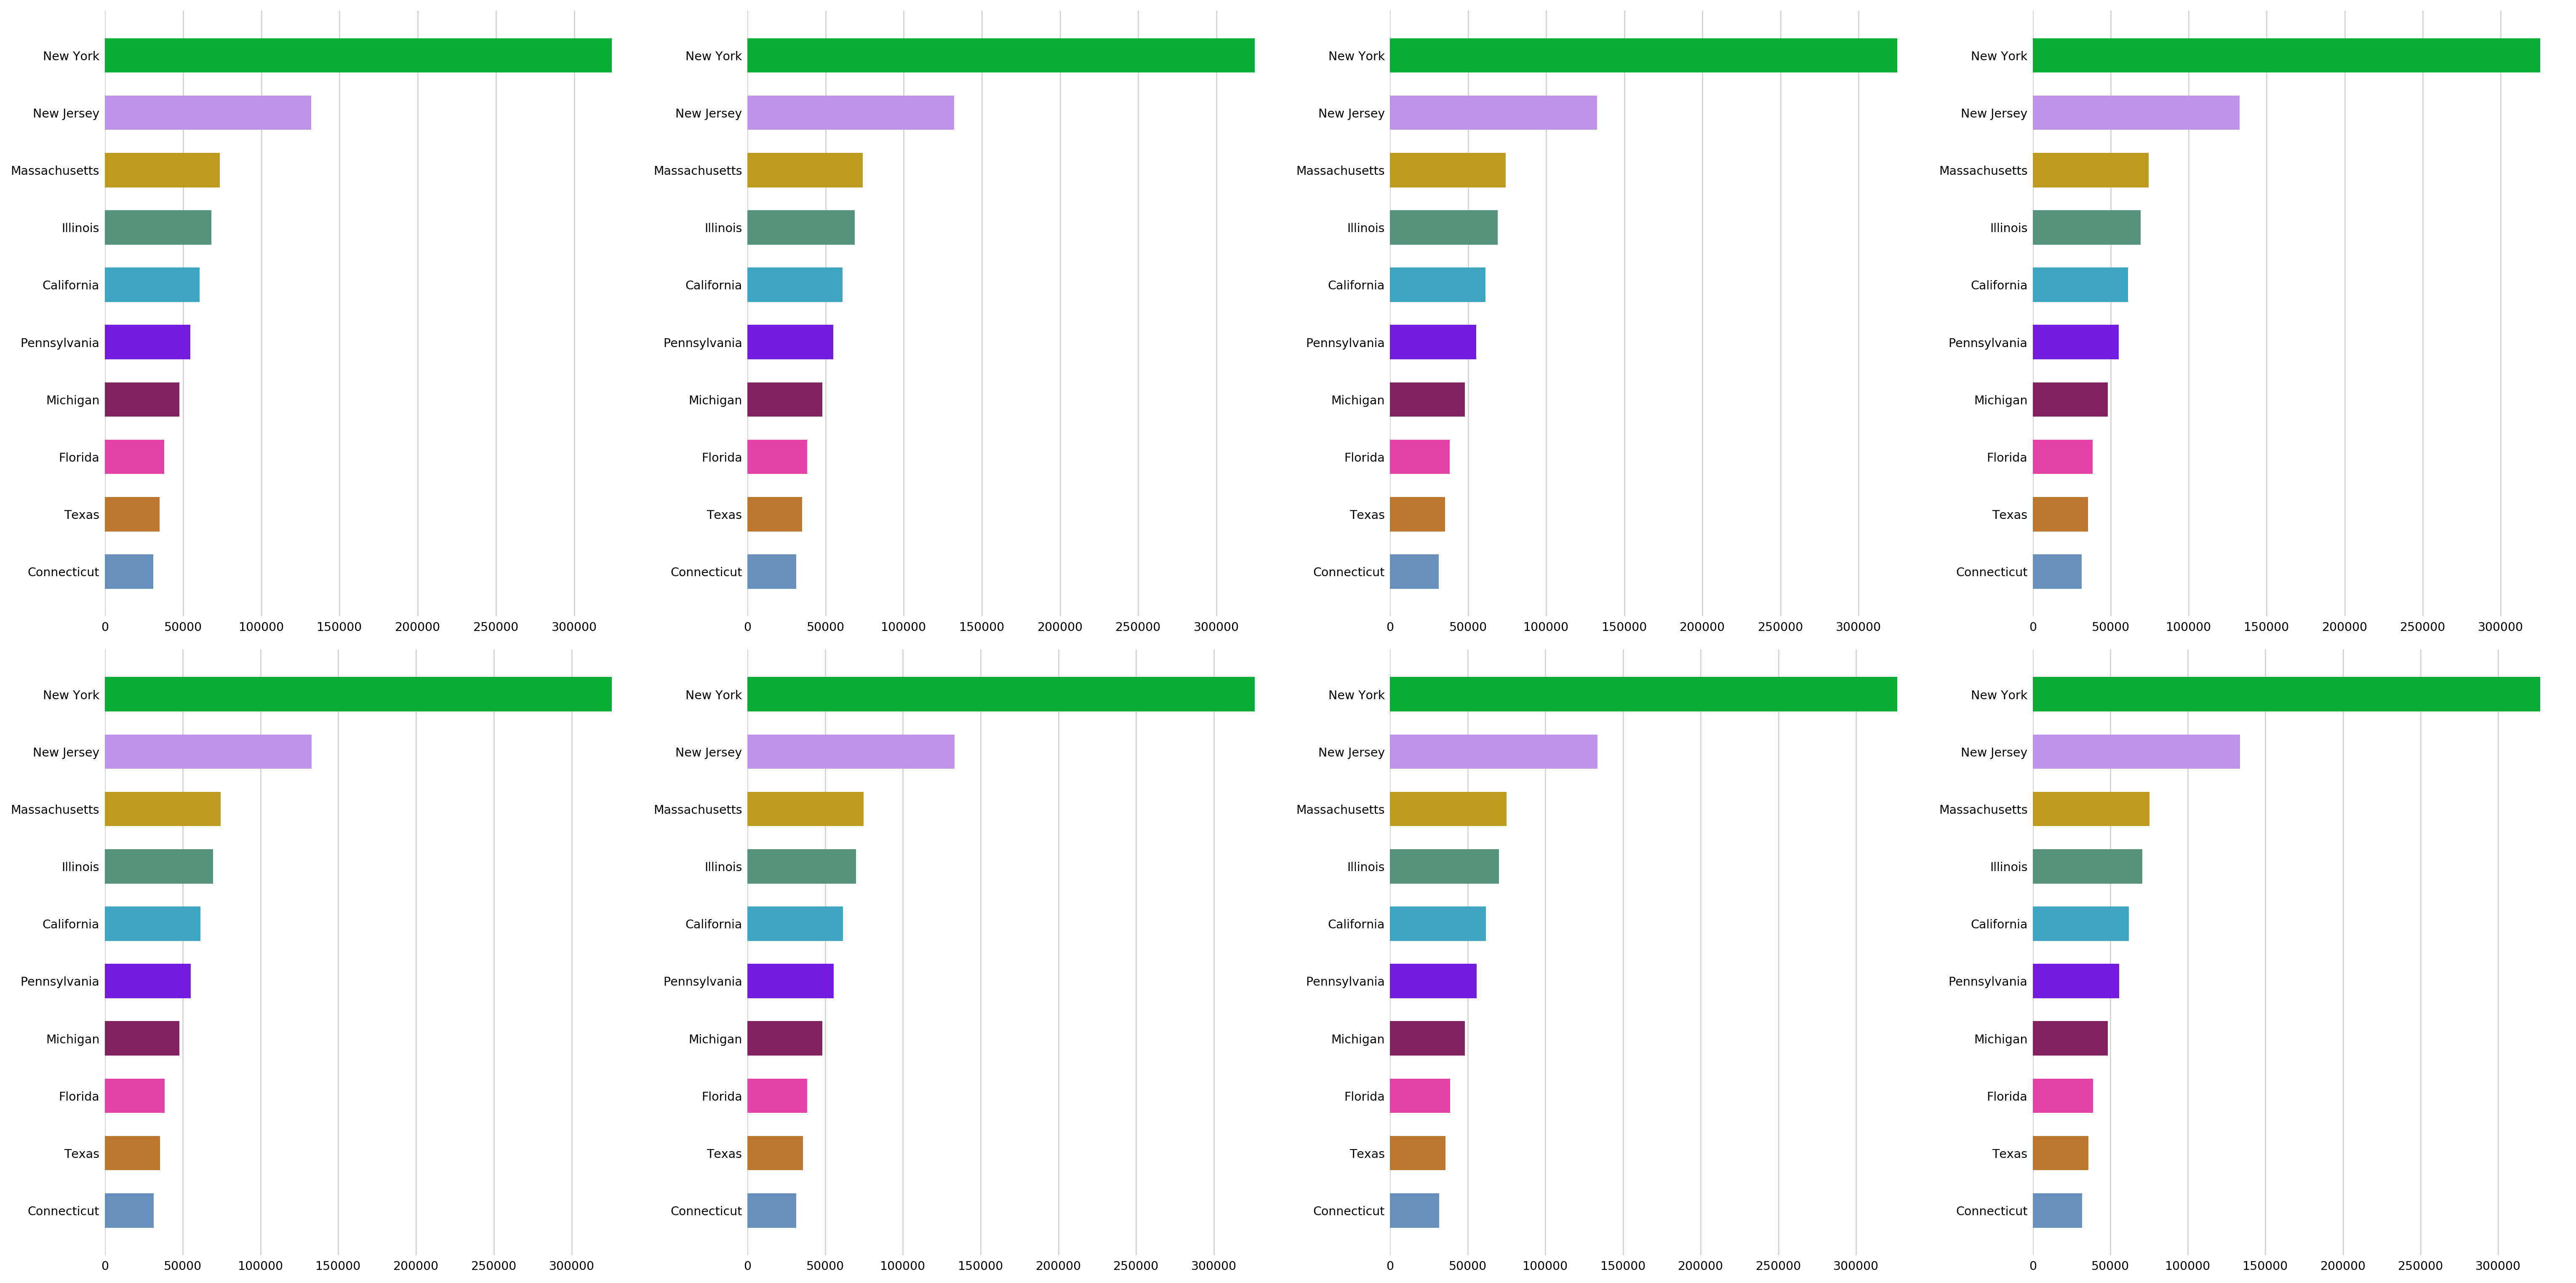

In [25]:
fig, ax_array = plt.subplots(nrows=2, ncols=4, figsize=(24, 12), 
                             dpi=256, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    tb = pd.DataFrame({'colors':df.colors,'width':df_expanded.iloc[i],'label':df.colors.index})
    tb.index = df_rank_expanded.iloc[i].values
    tb = tb.sort_index(ascending = 0).head(10)
    ax.barh(y=list(range(10,0,-1)),height=0.6,width=tb.width,color=tb.colors,tick_label= tb.label)
#     ax.barh(y=normalize(tb.index,1,9.5),height=0.8,width=tb.width,color=tb.colors,tick_label= tb.label)
    nice_axes(ax)
# ax_array[0].set_title('2020-03-29')
# ax_array[-1].set_title('2020-03-30');

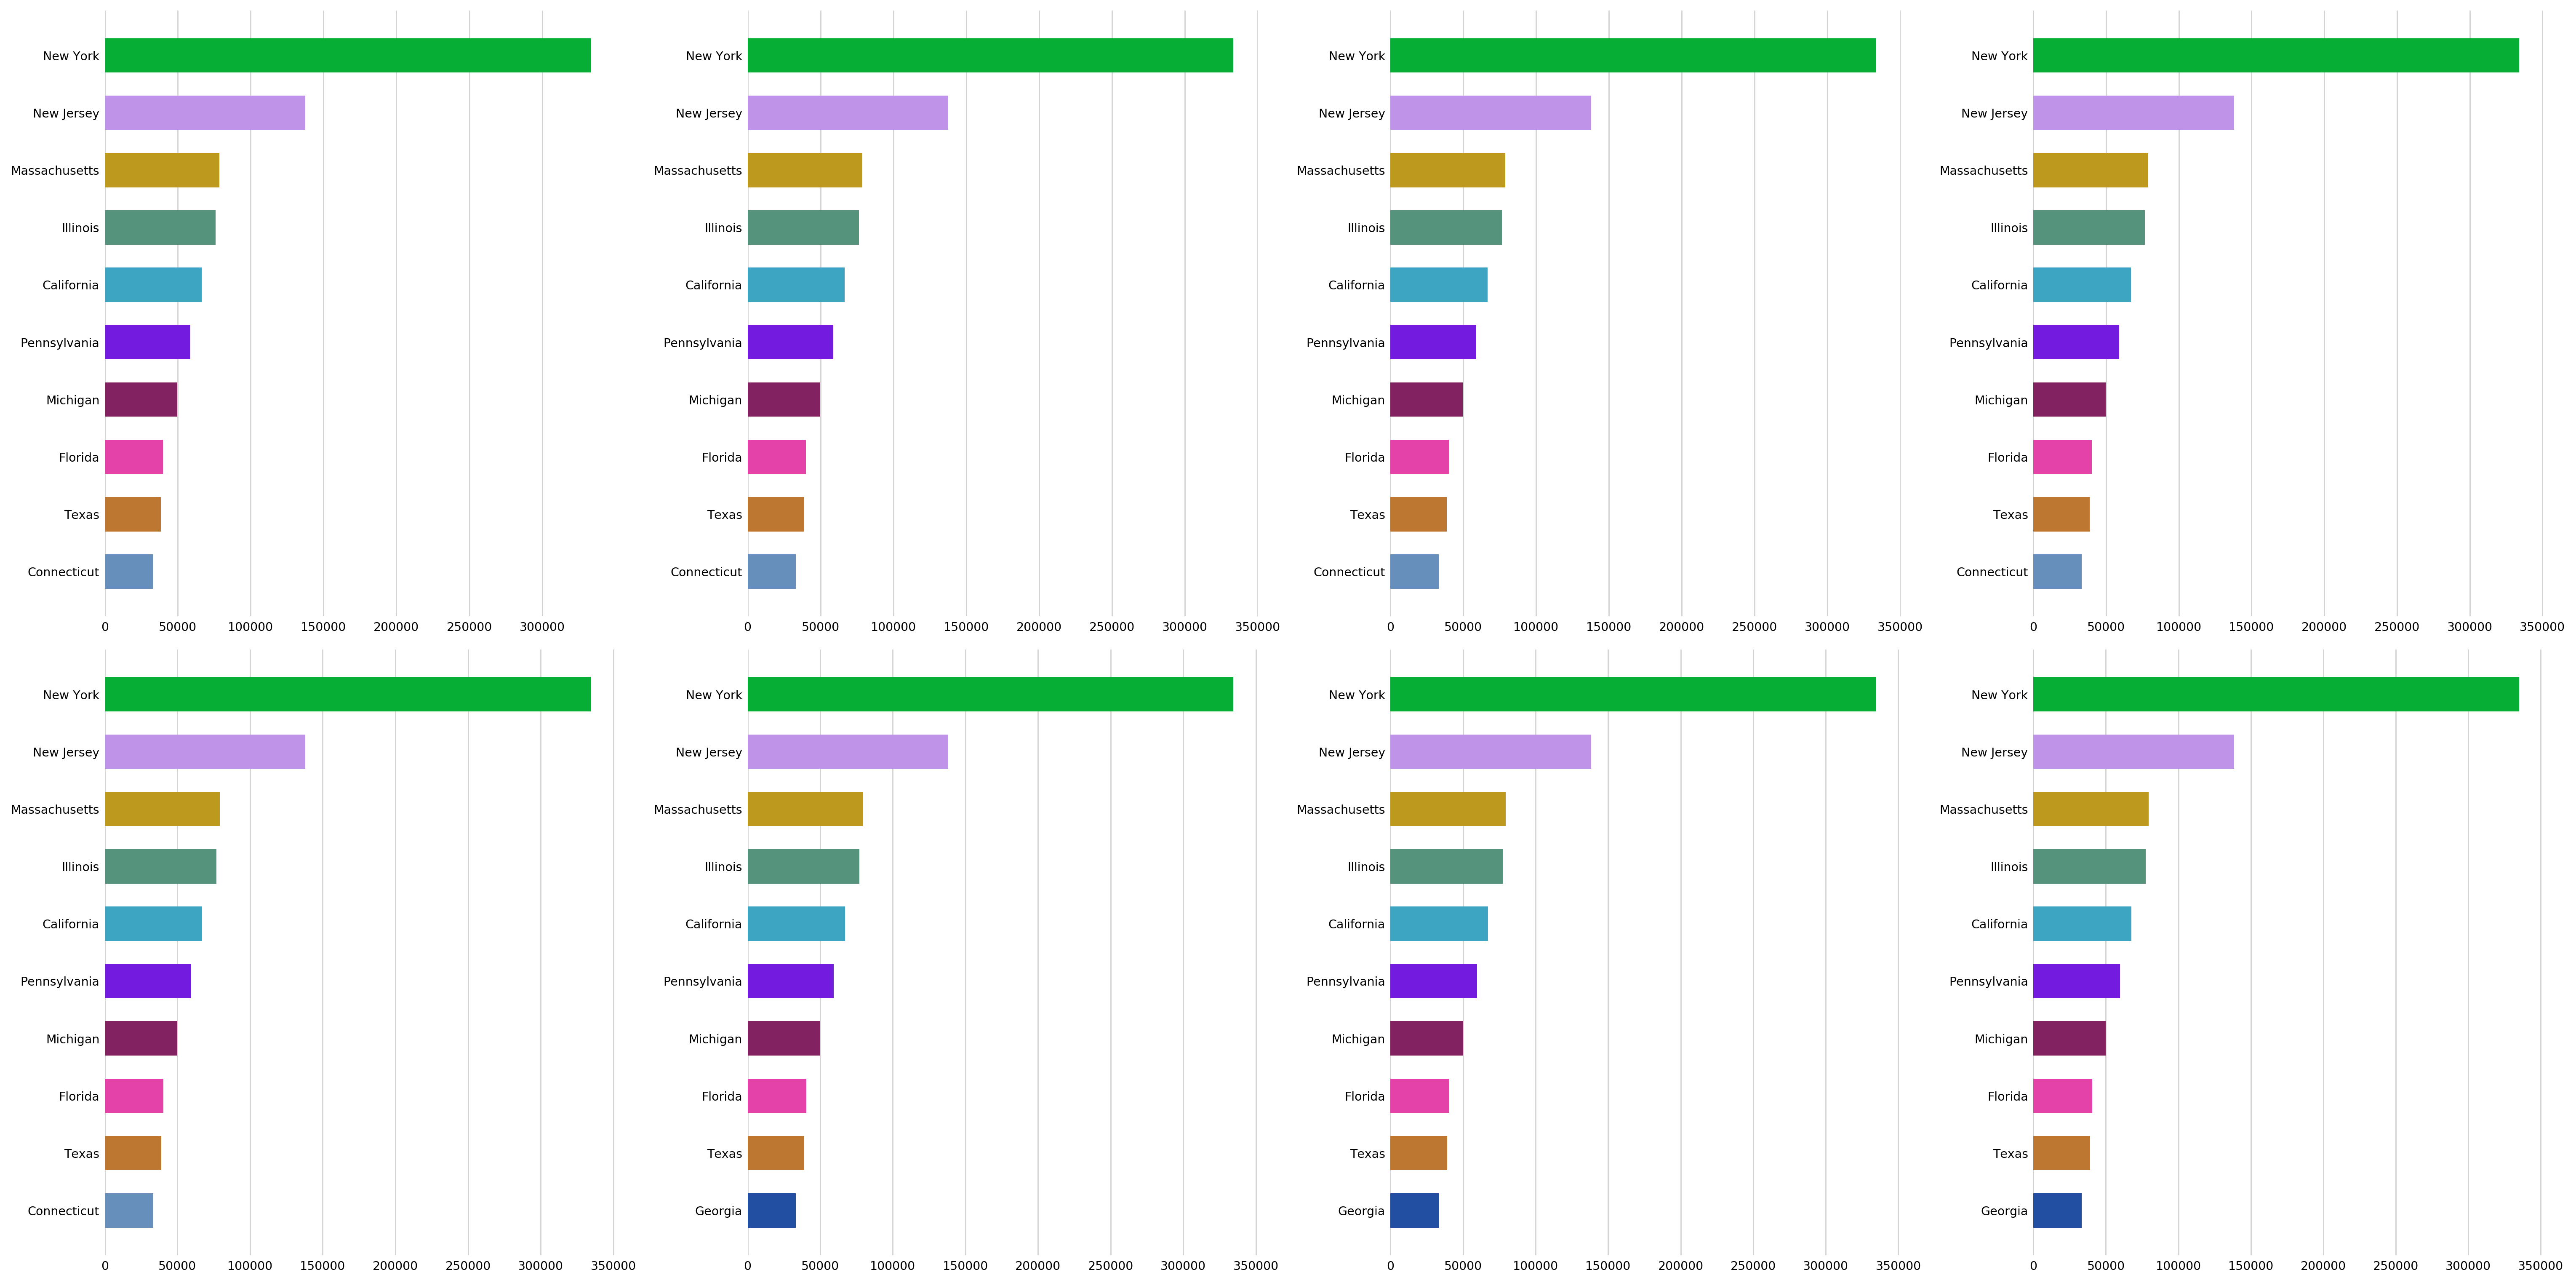

In [26]:
fig, ax_array = plt.subplots(nrows=2, ncols=4, figsize=(24, 12), 
                             dpi=256, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=24):
    tb = pd.DataFrame({'colors':df.colors,'width':df_expanded.iloc[i],'label':df.colors.index})
    tb.index = df_rank_expanded.iloc[i].values
    tb = tb.sort_index(ascending = 0).head(10)
    ax.barh(y=list(range(10,0,-1)),height=0.6,width=tb.width,color=tb.colors,tick_label= tb.label)
#     ax.barh(y=normalize(tb.index,1,9.5),height=0.8,width=tb.width,color=tb.colors,tick_label= tb.label)
    nice_axes(ax)

## Write a function to prepare all of the data
We can copy and paste the code above into a function to automate the process of preparing any data for the bar chart race. Then use it to create two final DataFrames of all the data needed for plotting.

In [27]:
def prepare_data(df, steps=5):
    dates = get_dates(df.columns)
    df2 = df.loc[:,dates]
    df2 = df2.reset_index()
    df2= df2.T
    df2 = df2.iloc[1:]
    df2.columns = df.index
    df2 = df2.reset_index()
    df2.index = df2.index * 5
    last_idx = df2.index[-1] + 1
    df_expanded = df2.reindex(range(last_idx))
    df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('index')
    df_expanded = df_expanded.apply(pd.to_numeric, errors='coerce')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.tail()

get 163 records


Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
index                                                                      
7/1/2020        39191.8   982.8  84773.0   21372.6    240254.8   33076.6   
7/1/2020        39421.6   990.6  85441.0   21548.2    241828.6   33141.2   
7/1/2020        39651.4   998.4  86109.0   21723.8    243402.4   33205.8   
7/1/2020        39881.2  1006.2  86777.0   21899.4    244976.2   33270.4   
7/2/2020        40111.0  1014.0  87445.0   22075.0    246550.0   33335.0   

Province_State  Connecticut  Delaware   Florida  Georgia  ...  South Dakota  \
index                                                     ...                 
7/1/2020            46586.8   11554.2  161018.8  84935.4  ...        6839.4   
7/1/2020            46601.6   11598.4  163040.6  85628.8  ...        6852.8   
7/1/2020            46616.4   11642.6  165062.4  86322.2  ...        6866.2   
7/1/2020            46631.2   11686.8  167084.2  87015.6  ...        6879.6   
7/2/2020            46646.0   11731.0  169106.0  87709.0  ...        6893.0   

Province_State  Tennessee     Texas     Utah  Vermont  Virginia  Washington  \
index                                                                         
7/1/2020          45630.0  173721.8  22826.8   1213.4   63309.4     33578.2   
7/1/2020          45945.0  175075.6  22937.6   1216.8   63415.8     33721.4   
7/1/2020          46260.0  176429.4  23048.4   1220.2   63522.2     33864.6   
7/1/2020          46575.0  177783.2  23159.2   1223.6   63628.6     34007.8   
7/2/2020          46890.0  179137.0  23270.0   1227.0   63735.0     34151.0   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
7/1/2020               2993.8    29306.8   1521.2  
7/1/2020               3008.6    29414.6   1528.4  
7/1/2020               3023.4    29522.4   1535.6  
7/1/2020               3038.2    29630.2   1542.8  
7/2/2020               3053.0    29738.0   1550.0  

[5 rows x 50 columns]

In [28]:
df_rank_expanded.tail()

Province_State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
index                                                                      
7/1/2020           31.0     2.0     41.0      22.0        49.0      27.0   
7/1/2020           31.0     2.0     41.0      22.0        49.0      27.0   
7/1/2020           31.0     2.0     41.0      22.0        49.0      27.0   
7/1/2020           31.0     2.0     41.0      22.0        49.0      27.0   
7/2/2020           31.0     2.0     41.0      22.0        49.0      27.0   

Province_State  Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
index                                                    ...                 
7/1/2020               33.8      14.0     46.0     42.0  ...          11.0   
7/1/2020               33.6      14.0     46.0     42.0  ...          11.0   
7/1/2020               33.4      14.0     46.0     42.0  ...          11.0   
7/1/2020               33.2      14.0     46.0     42.0  ...          11.0   
7/2/2020               33.0      14.0     46.0     42.0  ...          11.0   

Province_State  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
index                                                                   
7/1/2020             32.4   48.0  24.0      4.0      37.0        28.0   
7/1/2020             32.8   48.0  24.0      4.0      37.0        28.0   
7/1/2020             33.2   48.0  24.0      4.0      37.0        28.0   
7/1/2020             33.6   48.0  24.0      4.0      37.0        28.0   
7/2/2020             34.0   48.0  24.0      4.0      37.0        28.0   

Province_State  West Virginia  Wisconsin  Wyoming  
index                                              
7/1/2020                  6.0       25.0      5.0  
7/1/2020                  6.0       25.0      5.0  
7/1/2020                  6.0       25.0      5.0  
7/1/2020                  6.0       25.0      5.0  
7/2/2020                  6.0       25.0      5.0  

[5 rows x 50 columns]

## Animation

In [29]:
tb.width

50.000    335110.875
49.000    138584.375
48.000     79536.625
47.000     77534.000
46.000     67471.500
45.000     59766.625
44.000     50034.750
43.000     40521.625
42.000     39150.000
40.875     33456.000
Name: width, dtype: float64

In [30]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
#     y = df_rank_expanded.iloc[i]
#     width = df_expanded.iloc[i]
#     ax.barh(y=y, width=width, color=colors, tick_label=labels)
    tb = pd.DataFrame({'colors':df.colors,'width':df_expanded.iloc[i],'label':df.colors.index})
    tb.index = df_rank_expanded.iloc[i].values
    tb = tb.sort_index(ascending = 0).head(10)
    ax.barh(y=list(range(10,0,-1)),height=0.6,width=tb.width,color=tb.colors,tick_label= tb.label)
    date_str = df_expanded.index[i]
    ax.set_title(f'COVID-19 confirmed cases by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(15, 10), dpi=300)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=250, repeat=False)

### Return animation HTML or save to disk
Call the `to_html5_video` method to return the animation as an HTML string and then embed it in the notebook with help from the `IPython.display` module

In [31]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

In [32]:
anim.save('media/covid19.mp4')